# How Models Work

## Decision Tree Models

Determine how to break up the data into categories.

```
              First decision
                   /\
                  /  \
               yes    no
               |       |
               V       V
    first decision    second decision
```


The point at the bottom where we make a prediction is called a **leaf**.

You can capture more factors using a tree that has more "splits." These are called "deeper" trees.


## Exploring the Data

In [1]:
import pandas as pd
print('imported pandas')

imported pandas


**[Pandas]()** is the primary tool for exploring and manipulating data.

1. a *DataFrame* is similar to a table of data.
2. a *Series* is similar to a column of data.



In [ ]:
some_csv_flie = 'path/to/houses_data.csv'
# store data to DataFrame object
houses_data = pd.read_csv(some_csv_flie)
# pretty output of data as table 
houses_data.describe()

#### Data Description

1. Count - how many rows have non-missing values
2. Mean  - the average
3. Std   - the standard deviation
4. min, 25%, 50%, 75% and max  - sorting each column from lowest to highest value, the smallest value is the min, a quarter way through the list is a number bigger than 25% of the values and smaller than 75% of the values, that is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number


## Machine Learning Model

#### Selecting Model Data

Pare down the overwhelming amount of data.


In [ ]:
houses_data.columns

Output:
```
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
```

In [ ]:
# drop missing values (think of na as "not available")
houses_data = houses_data.dropna(axis=0)
# select prediction target
y = houses_data.Price
# select features
houses_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = houses_data[houses_features]

There are many ways to select a subset of your data, such as selecting one or more features.

##### Dot Notation - Select the Prediction Target

The dot notation pulls out a single column of data.

*By convention, the prediction target is called y.*

```
y = houses_data.Price
```

##### Choosing Features
```
houses_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
```

*By convention, this data is called X.*

```
X = houses_data[houses_features]
```

**Visualy check your data**, you'll frequently find surprises in the dataset that deserve further inspection

In [ ]:
X.describe()
X.head()      # return first few rows

## Building a Model

**[Scikit-learn]()** is the most popular library, used to model types of data stored in DataFrames.

### Steps to Building a Model

1. Define - What type of model will it be? (Decision tree, regression model, classification model etc.)
2. Fit - The **heart of modeling**, capture patterns from provided data
3. Predict
4. Evaluate - determine how accurate the predictions are


Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# random states - constant seed to ensure same results each run
house_model = DecisionTreeRegressor(random_state=1)
house_model.fit(X, y)

Output:
```
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')
```

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run - **this is considered a good practice.**

We now have a fitted model that we can use to make predictions.

Let's make predictions for the first few rows of the training data to see how the predict function works.

In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are:")
print(house_model.predict(X.head()))

Output:
```
Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]
```


## Model Validation

Measuring model quality using a **loss function** is the key to iteratively improving your models.
There are many metrics for summarizing model quality.

### Mean Absolute Error (MAE)

With the MAE metric, we take the **absolute value of each error**, then take the average of those absolute errors.


Output:
```
434.71594577146544
```

### The Problem with "In-Sample" Scores¶

Using a single "sample" of houses for both building the model and evaluating it is bad. The model's job is to find patterns that predict home prices - Since this pattern was derived from the training data, the model will appear accurate in the training data and will not necessarily hold for new data.

### Validation Data

The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it **hasn't seen before**.
we can use `train_test_split` to split data into `train` and `test`.

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)
# Specify type of model
house_model = DecisionTreeRegressor()
# fit model
house_model.fit(train_X, train_y)

# get predicted prices on validation data
test_predictions = house_model.predict(test_X)
print(mean_absolute_error(test_y, test_predictions))

Output:
```
264067.7030342156
```

Your mean absolute error for the in-sample data was about 500 dollars. Out-of-sample it is more than 250,000 dollars!


## Underfitting and Overfitting

### Experimenting With Different Models

**underfitting** - failing to capture relevant patterns, leading to less accurate predictions 

=> when a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data (Example: very shallow desicion tree).

**overfitting** - capturing spurious patterns that won't recur in the future, leading to less accurate predictions 

=> When a model matches the training data almost perfectly, but does poorly in validation and other new data (Example: very deep desicion tree).

We want to find the sweet spot between underfitting and overfitting - visually, we want the low point of the (red) validation curve:

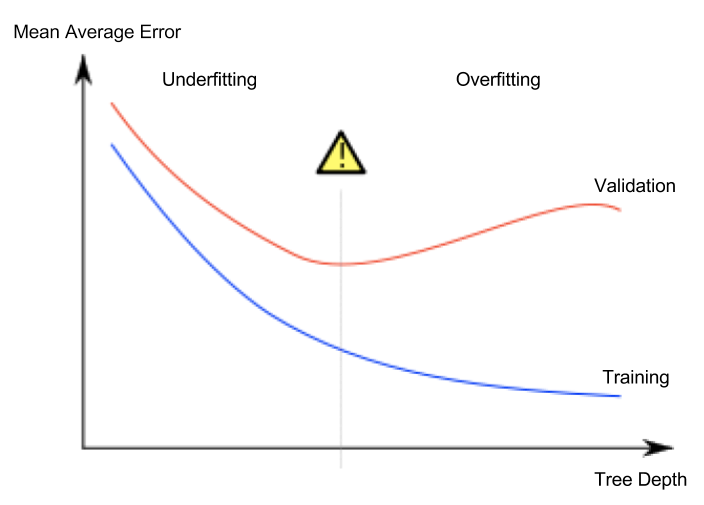

There are a few alternatives for controlling the tree depth.

The `max_leaf_nodes` argument provides a very sensible way to control overfitting vs underfitting (more leaves => overfitting).



In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# compare MAE scores from different values for max_leaf_nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    # get MAE of unseen data!
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# find optimal max_leaf_nodes value
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


"""
# Here is a short solution with a dict comprehension.
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)
"""

Output:
```
Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  254983
```

Of the options listed, 500 is the optimal number of leaves.


# Random Forest Models

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)